# Preprocessing and cleaning of the data part 2

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("../../data/Ana Health_Tabela Modelo Previsão Churn - Tabela.csv")

In [4]:
data.head()

,"PESSOA, PIPEDRIVE",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 63,Unnamed: 64,"COBRANÇA, VINDI",Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
1,250,1971-04-01,64,82,São Paulo,São Paulo,04534-020,417,NaN,2021-01-28,...,2,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
2,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
3,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
4,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE


In [5]:
def column_label_to_index(col_label):
    col_index = 0
    for c in col_label.upper():
        col_index = col_index * 26 + (ord(c) - ord('A') + 1)
    return col_index - 1


def add_prefix_to_first_row(dataframe, prefix, start_col_label, end_col_label):
    start_col = column_label_to_index(start_col_label)
    end_col = column_label_to_index(end_col_label)
    for col in range(start_col, end_col + 1):
        dataframe.iat[0, col] = prefix + dataframe.iat[0, col]

In [6]:
add_prefix_to_first_row(data, 'PESSOA_PIPEDRIVE_', 'A', 'R')
add_prefix_to_first_row(data, 'FUNIL_ASSINATURA_PIPEDRIVE_', 'S', 'X')
add_prefix_to_first_row(data, 'FUNIL_ONBOARDING_PIPEDRIVE_', 'Y', 'AH')
add_prefix_to_first_row(data, 'ATENDIMENTOS_AGENDA_', 'AJ', 'AY')
add_prefix_to_first_row(data, 'WHOQOL_', 'AZ', 'BD')
add_prefix_to_first_row(data, 'COMUNICARE_', 'BE', 'BE')
add_prefix_to_first_row(data, 'TWILIO_', 'BF', 'BM')
add_prefix_to_first_row(data, 'COBRANÇA_VINDI_', 'BN', 'BU')

In [7]:
data.columns = data.iloc[0]
data = data.drop(data.index[0])

In [8]:
data.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_birthdate,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_id_health_plan,PESSOA_PIPEDRIVE_id_person_recommendation,PESSOA_PIPEDRIVE_contract_start_date,...,TWILIO_Ligações Outbound,TWILIO_Data Última Ligações Outbound,COBRANÇA_VINDI_Qde Total de Faturas,COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança,COBRANÇA_VINDI_Método de Pagamento,COBRANÇA_VINDI_Valor Médio da Mensalidade,COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento,COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes,COBRANÇA_VINDI_Valor Total Inadimplência,COBRANÇA_VINDI_Qde Perfis de Pagamento Inativos
1,250,1971-04-01,64,82,São Paulo,São Paulo,04534-020,417,NaN,2021-01-28,...,2,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
2,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
3,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
4,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
5,317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE


In [9]:
import missingno as msno

<Axes: xlabel='0'>

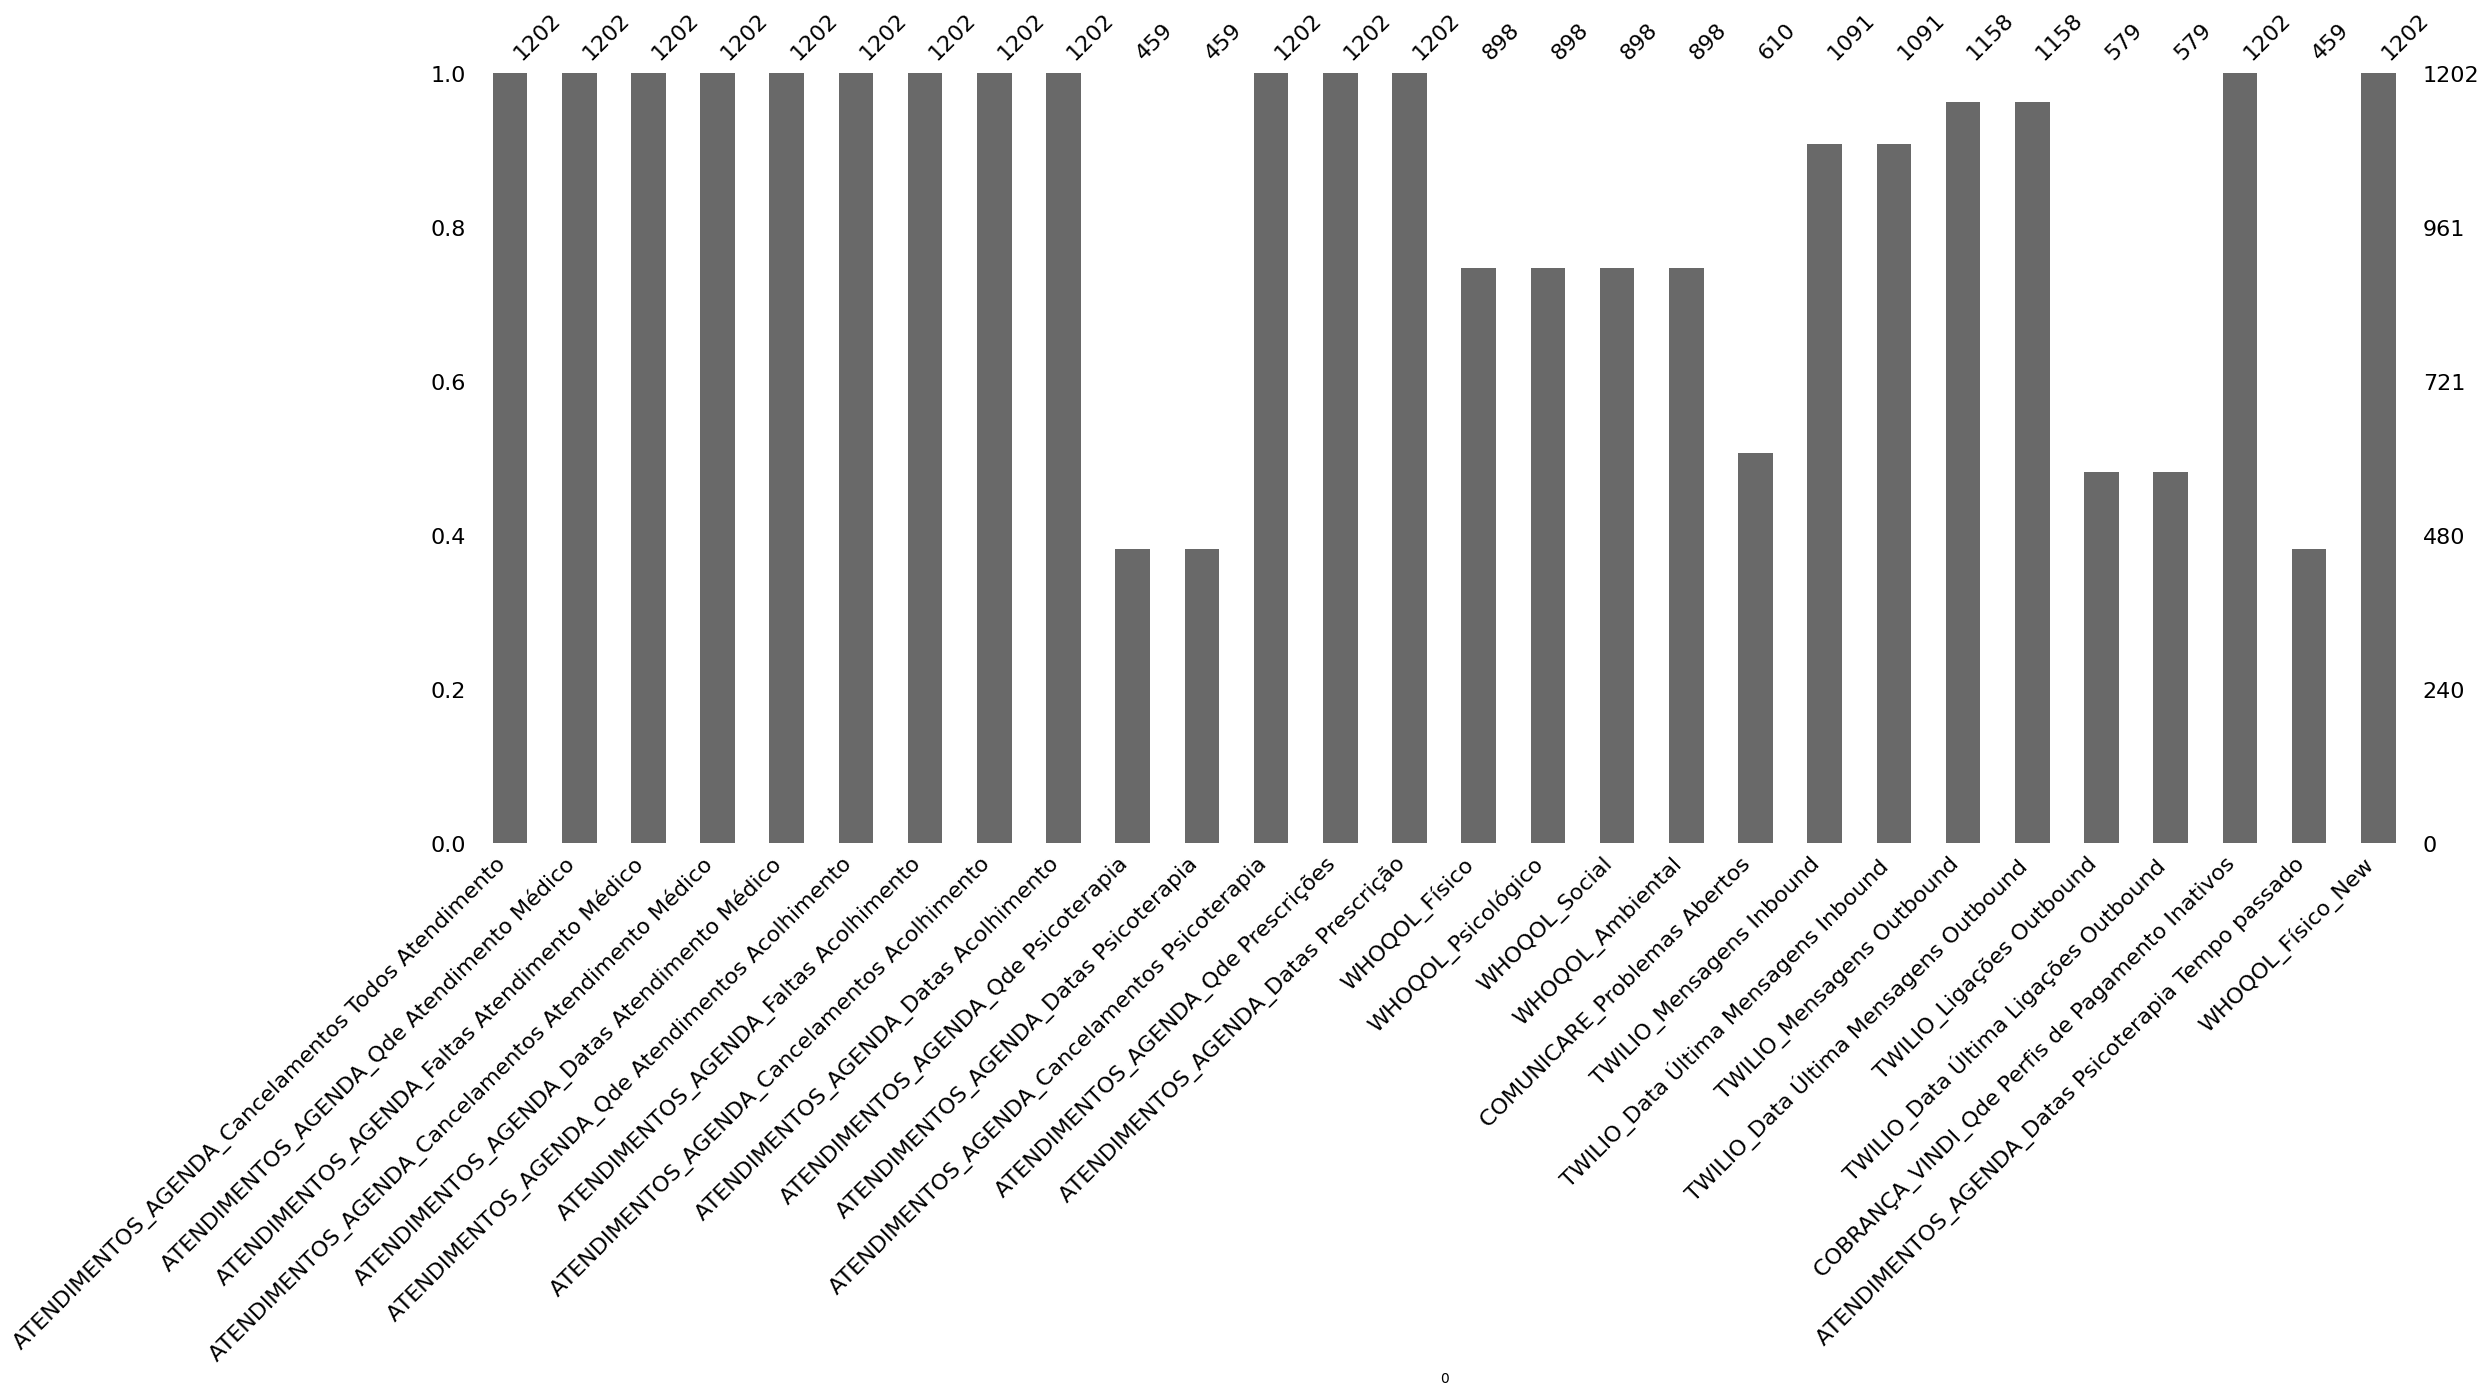

In [62]:
msno.bar(data.iloc[:,36:])

## Dropping columns with no information 2

    - ATENDIMENTOS_AGENDA_Faltas Psicoterapia: Contagem das faltas considerando apenas as sessões de psicoterapia
    
    - TWILIO_Ligações Inbound:  Contagem de ligação feitas pela pessoa

    - TWILIO_Data Última Ligações Inbound: Data da última ligação feitas pela pessoa

    - COBRANÇA_VINDI_Qde Total de Faturas : Contagem de faturas emitidas para associados PF

    - COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança: Contagem das tentativas de cobrança para associados PF

    - COBRANÇA_VINDI_Método de Pagamento : Método de pagamento utilizado por associados PF: Cartão de Crédito, Boleto, Dinheiro (Pix)

    - COBRANÇA_VINDI_Valor Médio da Mensalidade : Média do valor cobrado por mês de associados PF

    - COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento : Contagem de faturas pagas após o vencimento de associados PF

    - COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes : Contagem de faturas vendidas de associados PF

    - COBRANÇA_VINDI_Valor Total Inadimplência : Soma do valor das faturas vencidas de associados PF


In [11]:
data["ATENDIMENTOS_AGENDA_Faltas Psicoterapia"].value_counts()

ATENDIMENTOS_AGENDA_Faltas Psicoterapia
1     85
2     36
3     17
4     14
5      9
8      7
6      6
7      4
12     1
10     1
Name: count, dtype: int64

In [12]:
data["TWILIO_Ligações Inbound"].value_counts()

TWILIO_Ligações Inbound
1     73
2     17
3      9
4      7
10     3
6      2
12     1
80     1
7      1
8      1
5      1
46     1
9      1
Name: count, dtype: int64

In [13]:
data["TWILIO_Data Última Ligações Inbound"].value_counts()

TWILIO_Data Última Ligações Inbound
2023-07-11 00:57:34    3
2023-04-21 15:35:54    2
2023-07-04 01:30:01    2
2022-09-29 11:53:43    1
2023-06-10 19:18:13    1
                      ..
2022-05-11 09:41:48    1
2022-05-08 13:19:22    1
2022-08-08 12:22:12    1
2023-09-16 14:21:26    1
2023-10-07 09:45:19    1
Name: count, Length: 114, dtype: int64

In [14]:
data["COBRANÇA_VINDI_Qde Total de Faturas"].value_counts()

COBRANÇA_VINDI_Qde Total de Faturas
3     35
1     32
2     26
5     22
8     20
4     20
7     18
6     13
9     12
10     8
11     8
13     8
14     8
12     6
16     5
15     5
20     2
21     1
23     1
18     1
30     1
Name: count, dtype: int64

In [15]:
data["COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança"].value_counts()

COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança
1     27
3     23
7     23
2     20
5     19
8     16
12    14
4     14
9     10
14     9
6      9
11     9
16     7
17     6
13     6
15     5
10     5
0      5
19     3
21     3
23     2
32     2
25     2
37     1
35     1
27     1
40     1
20     1
18     1
31     1
26     1
41     1
30     1
24     1
29     1
28     1
Name: count, dtype: int64

In [16]:
data["COBRANÇA_VINDI_Método de Pagamento"].value_counts()

COBRANÇA_VINDI_Método de Pagamento
Cartão de crédito    227
Dinheiro              15
Boleto YaPay           9
Pix                    1
Name: count, dtype: int64

In [17]:
data["COBRANÇA_VINDI_Valor Médio da Mensalidade"].value_counts()

COBRANÇA_VINDI_Valor Médio da Mensalidade
88.00     99
120.00    55
78.00     49
50.00      7
60.00      7
70.00      6
78.41      2
88.28      2
114.40     1
89.14      1
120.63     1
58.70      1
110.00     1
84.00      1
176.00     1
86.33      1
121.80     1
89.81      1
81.71      1
91.54      1
89.64      1
78.46      1
106.67     1
78.90      1
83.04      1
350.00     1
89.04      1
158.40     1
88.95      1
234.00     1
383.75     1
99.36      1
88.49      1
Name: count, dtype: int64

In [18]:
data["COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento"].value_counts()

COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento
0    150
1     53
2     19
3     13
4      8
7      3
5      2
6      2
8      1
9      1
Name: count, dtype: int64

In [19]:
data["COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes"].value_counts()

COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes
0    218
1     20
2      7
3      4
4      1
6      1
7      1
Name: count, dtype: int64

In [20]:
data["COBRANÇA_VINDI_Valor Total Inadimplência"].value_counts()

COBRANÇA_VINDI_Valor Total Inadimplência
0         218
120.00      8
88.00       7
78.00       3
234.00      2
156.00      2
264.00      2
352.00      2
158.40      1
312.00      1
350.00      1
420.00      1
179.65      1
616.00      1
176.00      1
60.00       1
Name: count, dtype: int64

In [21]:
data = data.drop(["ATENDIMENTOS_AGENDA_Faltas Psicoterapia","TWILIO_Ligações Inbound", "TWILIO_Data Última Ligações Inbound","COBRANÇA_VINDI_Qde Total de Faturas","COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança","COBRANÇA_VINDI_Método de Pagamento","COBRANÇA_VINDI_Valor Médio da Mensalidade","COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento","COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes","COBRANÇA_VINDI_Valor Total Inadimplência"], axis=1)

Analisando as colunas com mais de 40% de valores não nulos

## ATENDIMENTOS_AGENDA_Qde Psicoterapia

Descrição : Contagem de sessões de psicoterapia realizadas com a Ana Health

Observação : Valores Nan podem ser consideradores como "não realizou sessões de psicoterapia", então iremos preencher com 0


In [22]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"].value_counts(sort=False)

ATENDIMENTOS_AGENDA_Qde Psicoterapia
24     6
18    10
16     9
19    14
64     1
14    12
6     26
1     61
31     2
23     5
25     9
5     29
11    14
10    15
17     8
7     10
4     19
50     1
8     21
2     41
9     18
28     2
21     6
26     6
12     8
27     5
22     5
35     3
3     36
55     1
51     1
59     1
13     8
34     3
39     2
47     3
61     1
15    10
38     2
33     1
40     2
20     8
43     2
83     1
30     4
44     2
46     1
48     1
41     2
32     1
Name: count, dtype: int64

In [23]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"].fillna(0)

1       0
2       0
3       0
4       0
5       0
       ..
1198    0
1199    0
1200    0
1201    0
1202    0
Name: ATENDIMENTOS_AGENDA_Qde Psicoterapia, Length: 1202, dtype: object

## ATENDIMENTOS_AGENDA_Datas Psicoterapia

Descrição : Datas das sessões de psicoterapia


Observação : Os valores Nan podem ser interpretados como "Não realizou nenhuma sessão de psicoterapia", então iremos preencher os valores faltantes com 0.

Solução : Criamos uma nova Coluna ATENDIMENTOS_AGENDA_Datas Psicoterapia Tempo passado, que informa há quanto tempo a pessoa realizou a sessão de psicoterapia

In [24]:
data["ATENDIMENTOS_AGENDA_Datas Psicoterapia"].value_counts()

ATENDIMENTOS_AGENDA_Datas Psicoterapia
2023-11-13 19:00:00    6
2023-11-06 20:00:00    4
2023-11-08 21:00:00    4
2023-11-14 18:00:00    4
2023-11-08 19:00:00    4
                      ..
2023-03-28 16:30:00    1
2022-08-01 18:00:00    1
2022-07-25 08:00:00    1
2023-02-07 14:30:00    1
2023-11-10 20:00:00    1
Name: count, Length: 392, dtype: int64

In [25]:
from datetime import datetime

data["ATENDIMENTOS_AGENDA_Datas Psicoterapia"] = pd.to_datetime(data["ATENDIMENTOS_AGENDA_Datas Psicoterapia"])

data["ATENDIMENTOS_AGENDA_Datas Psicoterapia Tempo passado"] = datetime.now() - data["ATENDIMENTOS_AGENDA_Datas Psicoterapia"]


In [26]:
data["ATENDIMENTOS_AGENDA_Datas Psicoterapia Tempo passado"].value_counts()

ATENDIMENTOS_AGENDA_Datas Psicoterapia Tempo passado
9 days 13:11:37.694445      6
16 days 12:11:37.694445     4
14 days 11:11:37.694445     4
8 days 14:11:37.694445      4
14 days 13:11:37.694445     4
                           ..
239 days 15:41:37.694445    1
478 days 14:11:37.694445    1
486 days 00:11:37.694445    1
288 days 17:41:37.694445    1
12 days 12:11:37.694445     1
Name: count, Length: 392, dtype: int64

## WHOQOL_Qde Respostas WHOQOL

Descrição : Contagem de respostas do questionaário de qualidade de vida WHOQOL

Observação : Iremos dropar a coluna por não ter relevância no modelo

<Axes: >

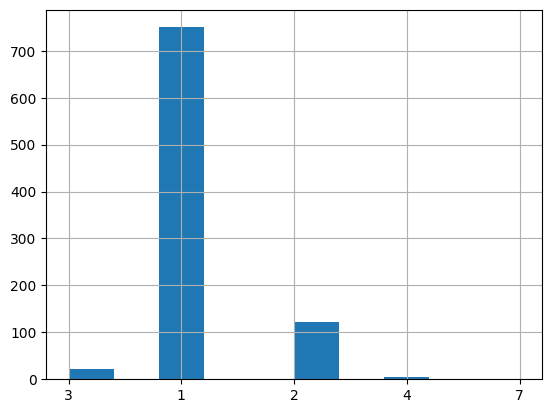

In [27]:
data["WHOQOL_Qde Respostas WHOQOL"].hist()

In [28]:
data["WHOQOL_Qde Respostas WHOQOL"].value_counts()

WHOQOL_Qde Respostas WHOQOL
1    750
2    121
3     21
4      5
7      1
Name: count, dtype: int64

In [29]:
data = data.drop(columns="WHOQOL_Qde Respostas WHOQOL")

## WHOQOL_Físico

    -Descrição : Nota dos aspectos físicos no questionário WHOQOL

    -Observação : Alguns valores possuem mais de uma nota, portanto foi pego a ultima nota da lista, e, por ser uma coluna de valores ordinários, os valores nulos foram preenchidos com a mediana da coluna em uma nova coluna "WHOQOL_Físico_New"


In [35]:
data["WHOQOL_Físico"].value_counts()

WHOQOL_Físico
3,90        64
3,70        63
4,10        63
4,00        59
3,60        58
            ..
4,4; 4,1     1
3,6; 4,9     1
4,0; 4,9     1
4,3; 4,7     1
3,4; 3,4     1
Name: count, Length: 139, dtype: int64

In [49]:
data["WHOQOL_Físico_New"] = data["WHOQOL_Físico"].str.split(';').str[-1].str.strip()

<Axes: >

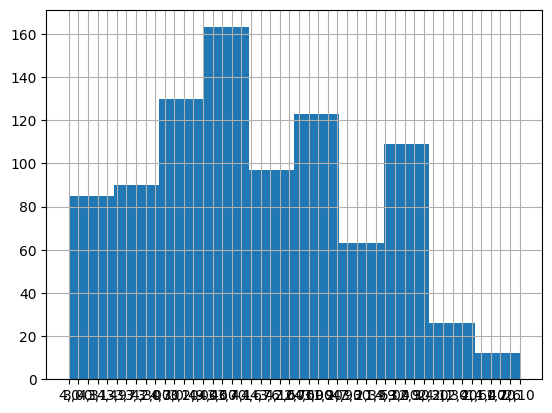

In [50]:
data["WHOQOL_Físico_New"].hist()

In [53]:
data["WHOQOL_Físico_New"] = data["WHOQOL_Físico_New"].str.replace(",",".")

In [54]:
data["WHOQOL_Físico_New"] = data["WHOQOL_Físico_New"].astype(float) 

In [56]:
mediana = data["WHOQOL_Físico_New"].median()
mediana

3.7

In [57]:
data["WHOQOL_Físico_New"] = data["WHOQOL_Físico_New"].fillna(mediana)

<Axes: >

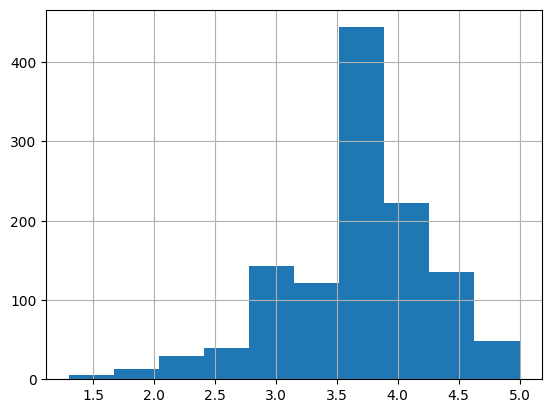

In [59]:
data["WHOQOL_Físico_New"].hist()